{'clean': [79.13, 93.92], 'brightness': [74.622, 91.914], 'contrast': [50.132, 75.536], 'defocus_blur': [61.776, 84.924], 'elastic_transform': [59.566, 81.07], 'fog': [60.116, 86.554], 'frost': [50.148, 80.168], 'gaussian_blur': [56.08, 80.054], 'gaussian_noise': [22.45, 27.958], 'glass_blur': [33.808, 50.994], 'impulse_noise': [36.282, 34.352], 'jpeg_compression': [52.006, 74.564], 'motion_blur': [50.666, 76.706], 'pixelate': [43.888, 72.712], 'saturate': [72.124, 88.746], 'shot_noise': [31.974, 42.72], 'snow': [60.092, 83.556], 'spatter': [69.038, 86.334], 'speckle_noise': [35.37, 49.102], 'zoom_blur': [54.758, 82.112]}


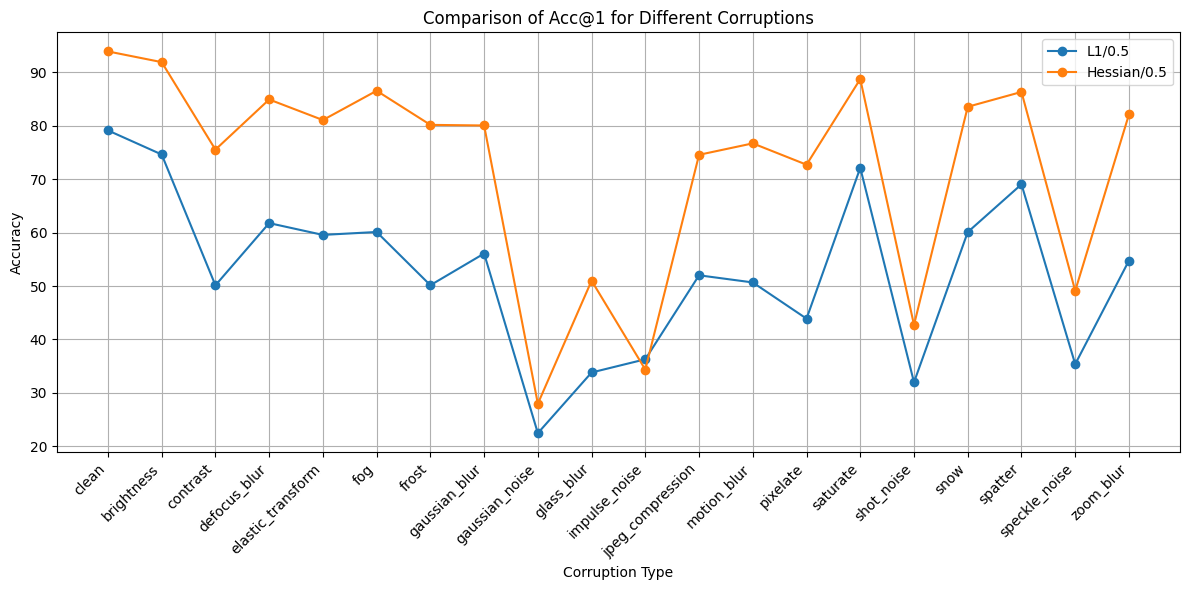

In [27]:
import matplotlib.pyplot as plt
import os
Acc1_dict = {'clean': [], 'brightness': [], 'contrast': [], 'defocus_blur': [], 'elastic_transform': [], 'fog': [], 'frost': [], 'gaussian_blur': [], 'gaussian_noise': [], 'glass_blur': [],
             'impulse_noise': [], 'jpeg_compression': [], 'motion_blur': [], 'pixelate': [], 'saturate': [], 'shot_noise': [], 'snow': [], 'spatter': [], 'speckle_noise': [], 'zoom_blur': []}
paths = ['logs/debug/ResNet18/CIFAR10/L1/0.0001/42/0.5/20250109110709/test/100', 'logs/debug/ResNet18/CIFAR10/Hessian/0.0001/42/0.5/20250109131035/test/100']
for path in paths:
    with open(os.path.join(path, 'total_result.txt')) as f:
        lines = f.readlines()
    # Acc1 = []
    for line in lines:
        line = line.split(' ')
        # Add the accuracy to the corresponding list
        Acc1_dict[line[1].strip('*')].append(float(line[line.index('Acc@1') + 1]))
Acc1_dict = {k: v for k, v in Acc1_dict.items() if v}
print(Acc1_dict)
# Plot Accuracy and save figure
# xlabel is Acc1_dict key and ylabel is Acc1_dict value
x_labels = list(Acc1_dict.keys())
plt.figure(figsize=(12, 6))
for i in range(len(Acc1_dict[list(Acc1_dict.keys())[0]])):
    y_values = [Acc1_dict[key][i] for key in x_labels]
    plt.plot(x_labels, y_values, marker='o', label=(paths[i].split('/')[4]+'/'+paths[i].split('/')[7]), linestyle='-')
plt.xlabel('Corruption Type')
plt.ylabel('Accuracy')
plt.title('Comparison of Acc@1 for Different Corruptions')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid()
plt.tight_layout()

plt.savefig('corruption_comparison.png')
plt.show()